# Visualizing Data w/ Pandas, Matplotlib and Seaborn
---
**Author:** Robert Kelley  
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**  

I developed this notebook to so we could walk through the approaches for visualizing data.  The dataset for this notebook was obtained from: https://github.com/allisonhorst/palmerpenguins.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

## Why is Visualization Important?

In [15]:
anscombe = sns.load_dataset("anscombe")

In [16]:
I = anscombe.query("dataset=='I'")
II = anscombe.query("dataset=='II'")
III = anscombe.query("dataset=='III'")
IV = anscombe.query("dataset=='IV'")


In [17]:
print(I.mean(),  II.mean(), III.mean(), IV.mean(),)

x    9.000000
y    7.500909
dtype: float64 x    9.000000
y    7.500909
dtype: float64 x    9.0
y    7.5
dtype: float64 x    9.000000
y    7.500909
dtype: float64


Reminder - you can get info about any function with the question mark syntax.

In [18]:
#plt.scatter?

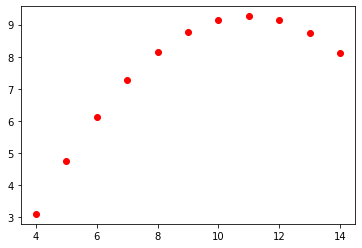

In [19]:
plt.scatter(II.x, II.y, color='red', marker='o')

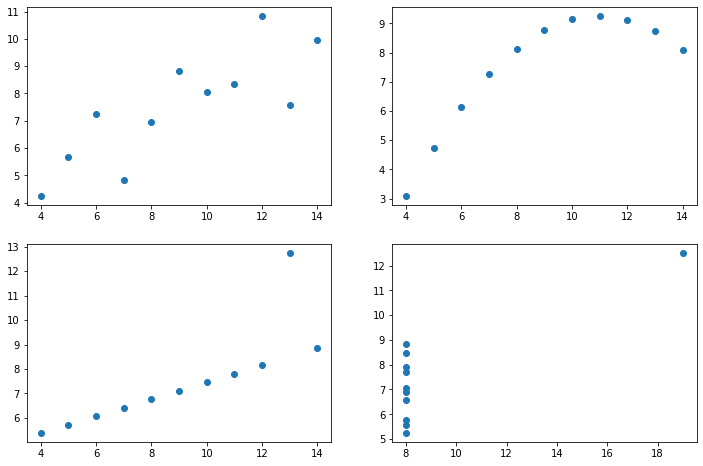

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax1.scatter(I.x,I.y)
ax1.xlabel = 'X'
ax2= fig.add_subplot(222)
ax2.scatter(II.x,II.y)
ax3= fig.add_subplot(223)
ax3.scatter(III.x,III.y)
ax4= fig.add_subplot(224)
ax4.scatter(IV.x,IV.y)

## Working with Other Data Sets
Seaborn provides several data sets you can learn with. You list them with get_dataset_names().

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

And you can load them as follows:

In [9]:
df = sns.load_dataset('flights')

In [10]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Line Charts

In [21]:
fmri = sns.load_dataset('fmri')

In [22]:
fmri.sample(5)

,subject,timepoint,event,region,signal
408,s3,10,stim,frontal,0.012525
484,s10,15,stim,frontal,-0.004118
954,s5,12,cue,frontal,-0.018146
209,s2,4,stim,parietal,0.196461
330,s8,4,stim,frontal,-0.012083


In [23]:
s13 = fmri.query("subject=='s13' and region=='frontal' and event=='stim'")
s13 = s13.sort_values(by='timepoint')
s13.index = s13.timepoint
s1 = fmri.query("subject=='s1' and region=='frontal' and event=='stim'")
s1 = s1.sort_values(by='timepoint')
s1.index = s1.timepoint

In [25]:
s1

,subject,timepoint,event,region,signal
timepoint,,,,,
0,s1,0,stim,frontal,-0.046049
1,s1,1,stim,frontal,-0.060273
2,s1,2,stim,frontal,-0.037520
3,s1,3,stim,frontal,0.057598
4,s1,4,stim,frontal,0.202123
5,s1,5,stim,frontal,0.315860
6,s1,6,stim,frontal,0.321335
7,s1,7,stim,frontal,0.204943
8,s1,8,stim,frontal,0.036685


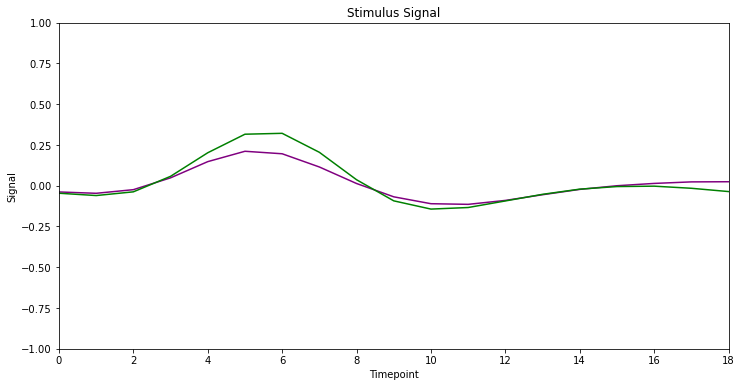

In [30]:
fig = plt.figure(figsize=(12,6))
plt.plot(s13.signal, color='purple')
plt.title('Stimulus Signal')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.axis([0,18,-1,1])
plt.plot(s1.signal, color='green')

## Bar Charts

In [31]:
mpg = sns.load_dataset('mpg')

In [33]:
mpg.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,27.9,4,156.0,105.0,2800,14.4,80,usa,dodge colt
237,30.5,4,98.0,63.0,2051,17.0,77,usa,chevrolet chevette
266,30.0,4,98.0,68.0,2155,16.5,78,usa,chevrolet chevette
187,17.5,8,305.0,140.0,4215,13.0,76,usa,chevrolet chevelle malibu classic
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
115,15.0,8,350.0,145.0,4082,13.0,73,usa,chevrolet monte carlo s
200,18.0,6,250.0,78.0,3574,21.0,76,usa,ford granada ghia
88,14.0,8,302.0,137.0,4042,14.5,73,usa,ford gran torino
378,38.0,4,105.0,63.0,2125,14.7,82,usa,plymouth horizon miser
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l


In [34]:
cylinders = mpg.cylinders.groupby(mpg.cylinders).count()

In [35]:
cylinders

cylinders
3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

<BarContainer object of 5 artists>

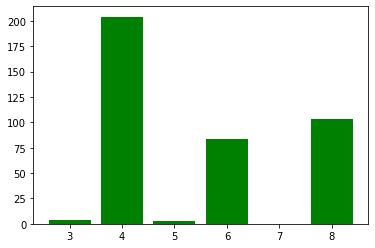

In [40]:
plt.bar(cylinders.index,cylinders.values, color='green')

In [49]:
cylinders = cylinders.sort_values()

In [54]:
cylinders.sort_index()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

Text(0, 0.5, 'Number of Cylinders')

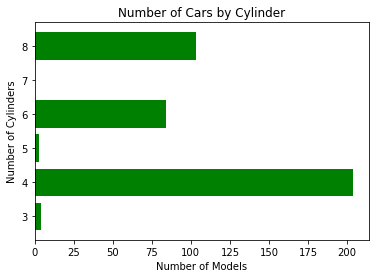

In [59]:
plt.barh(cylinders.index, cylinders.values, color='green')
plt.title('Number of Cars by Cylinder')
plt.xlabel('Number of Models')
plt.ylabel('Number of Cylinders')

<AxesSubplot:ylabel='Number of Cylinders'>

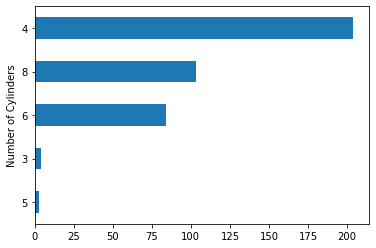

In [68]:
cylinders.sort_values().plot(kind='barh',xlabel='Number of Cylinders', ylabel='Number of Vehicles')

In [ ]:
cylinders.sort_values().plot

## Box/Whisker Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x24d0c91aa30>,
 'caps': [<matplotlib.lines.Line2D at 0x24d0c927130>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d0c91a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d0c9277f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d0c927b50>],
 'means': []}

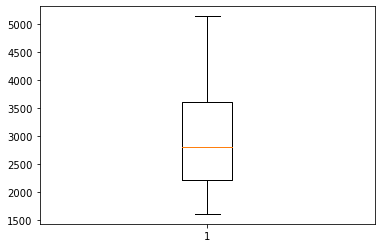

In [69]:
plt.boxplot(mpg.weight)

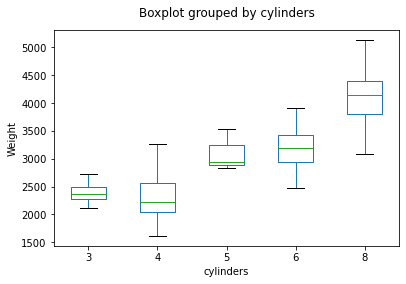

In [76]:
ax1 = mpg.boxplot(column='weight', by='cylinders') #creates reference to the plot AXIS object
ax1.set_title('')
ax1.set_ylabel('Weight')
ax1.grid(False)

## Histograms

In [77]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

(array([ 3.,  1.,  6.,  1., 10., 20., 13., 23., 41., 39., 32., 55., 33.,
        30., 22., 18., 19.,  9.,  7.,  5.,  5.,  2.,  0.,  2.,  2.]),
 array([ 8.   ,  8.672,  9.344, 10.016, 10.688, 11.36 , 12.032, 12.704,
        13.376, 14.048, 14.72 , 15.392, 16.064, 16.736, 17.408, 18.08 ,
        18.752, 19.424, 20.096, 20.768, 21.44 , 22.112, 22.784, 23.456,
        24.128, 24.8  ]),
 <BarContainer object of 25 artists>)

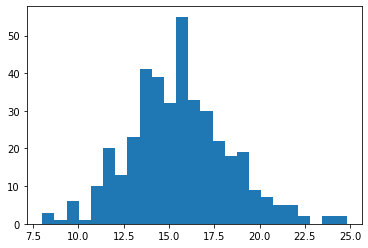

In [80]:
plt.hist(mpg.acceleration, bins=25)

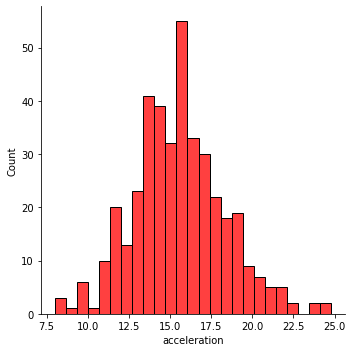

In [84]:
sns.displot(mpg.acceleration, color='red', bins=25)

## Kernel Density Plots

## Heatmaps

## Visualizing the Penguin Data

## Visualizing Linear Regression